# $$探討美國薪資與國內生產毛額之分配關係，以1990年至2020年為例$$

## 套件載入

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## 資料匯入:

In [93]:
data = pd.read_csv("Total wages and salaries.csv")
data

,Date,Total wages and salaries,Total population,Employment ratio,GDP,GDP deflator,CPI,MCPI,UCPI,SCPI,Capital stock,Labor share
0,1990,2564.522,249623000,62.800000,6004.733,3.75098,0.570953,5.055826,6.25495,0.355966,38181148.0,0.54575
1,1991,2626.972,252981000,61.650000,6264.540,3.37552,-1.162992,2.645997,2.98063,0.344374,38943580.0,-0.01610
2,1992,2781.676,256514000,61.466667,6680.803,2.27612,-1.206144,1.878014,2.96671,0.200106,39749632.0,0.80469
3,1993,2884.472,259919000,61.708333,7013.738,2.37228,-0.077163,2.817707,2.81096,0.303215,40619356.0,-0.94382
4,1994,3033.677,263126000,62.525000,7455.288,2.13422,-0.344215,1.216086,2.59740,0.108891,41576888.0,-1.01627
5,1995,3215.921,266278000,62.883333,7772.586,2.09942,0.197978,2.579647,2.53165,0.101357,42589128.0,-0.09490
6,1996,3414.515,269394000,63.175000,8259.771,1.82854,0.125785,2.200241,3.37882,0.180978,43715496.0,-0.04301
7,1997,3674.032,272657000,63.775000,8765.907,1.72535,-0.593514,3.068734,1.69705,0.248073,44934860.0,0.41074
8,1998,3967.072,275854000,64.075000,9293.991,1.12387,-0.785411,1.993669,1.60692,0.173370,46303760.0,2.19869
9,1999,4235.579,279040000,64.266667,9900.169,1.41344,0.635748,2.602373,2.67640,0.187110,47787892.0,0.47758


## 第一部份: 名目總薪資、名目GDP的比較
### 探討分配關係
### 1. 名目GDP與名目總薪資走勢圖(normal scale and log scale)
### 2. GDP分配給總薪資的比例
### 3. 人均名目GDP與人均名目薪資走勢圖(normal scale and log scale)
### 4. 人均名目GDP分配給人均名目薪資的比例
### (GDP、總薪資資料單位為十億，故計算時乘以10^9)

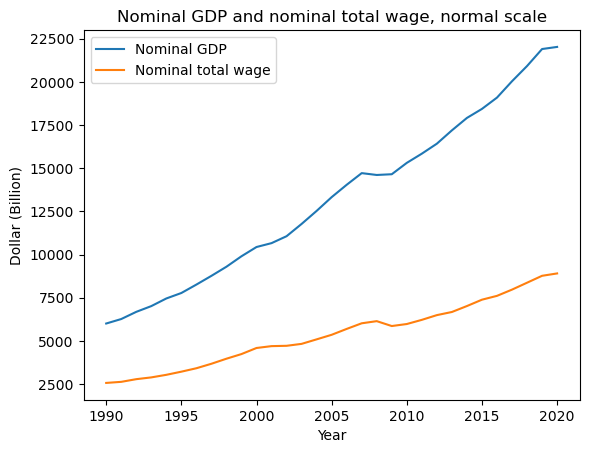

In [94]:
plt.plot(data["Date"], data["GDP"], label="Nominal GDP")
plt.plot(data["Date"], data["Total wages and salaries"], label="Nominal total wage")
#plt.ylim(55, 65)
plt.xlabel("Year")
plt.ylabel("Dollar (Billion)")
plt.title("Nominal GDP and nominal total wage, normal scale")
plt.legend()
plt.savefig('plot_11.png')
plt.show()

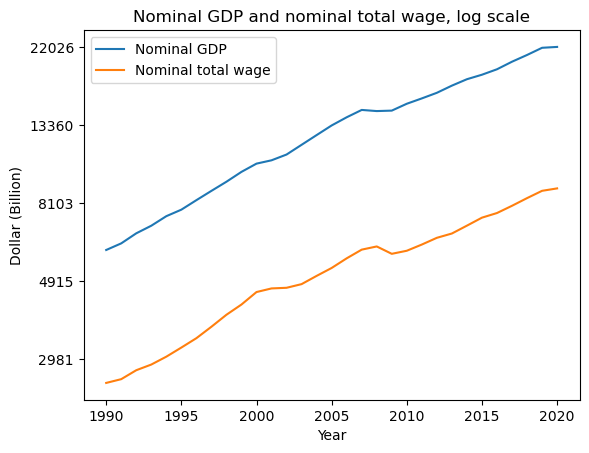

In [95]:
plt.plot(data["Date"], np.log(data["GDP"]), label="Nominal GDP")
plt.plot(data["Date"], np.log(data["Total wages and salaries"]), label="Nominal total wage")
#plt.ylim(55, 65)
plt.xlabel("Year")
plt.ylabel("Dollar (Billion)")
stick = [8.0, 8.5, 9.0, 9.5, 10.0]
plt.yticks(stick, [round(math.exp(i)) for i in stick])
plt.title("Nominal GDP and nominal total wage, log scale")
plt.legend()
plt.savefig('plot_12.png')
plt.show()

In [96]:
data["GDP per capita"] = data["GDP"] / data["Total population"] * (10**9)
data["Wage per worker"] = data["Total wages and salaries"] / (data["Total population"] * data["Employment ratio"] * 0.01) * (10**9)

In [97]:
pct = data["GDP deflator"] / data["MCPI"]
pct

0     0.741912
1     1.275708
2     1.211983
3     0.841918
4     1.754991
5     0.813840
6     0.831063
7     0.562235
8     0.563720
9     0.543135
10    0.687528
11    0.911689
12    0.515327
13    1.094094
14    1.404036
15    1.422894
16    1.132778
17    0.907946
18    5.323451
19    1.327856
20    0.869806
21    0.869453
22    1.040801
23    0.597442
24    0.730236
25    0.507642
26    0.465491
27    0.605211
28    0.787464
29    0.664179
30    0.934779
dtype: float64

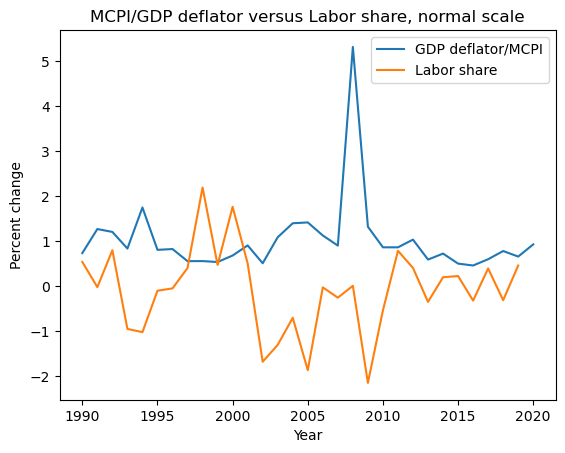

In [103]:
plt.plot(data["Date"], pct, label="GDP deflator/MCPI")
plt.plot(data["Date"], data["Labor share"], label="Labor share")

plt.xlabel("Year")
plt.ylabel("Percent change")
plt.title("MCPI/GDP deflator versus Labor share, normal scale")
plt.legend()
plt.savefig('plot_18.png')
plt.show()

### 第一部份結論:
### 1. 名目GDP與名目總薪資的差距逐年增加
### 2. 以對數尺度而言，名目GDP與名目總薪資約為等距成長
### 3. 每年名目GDP分配給名目總薪資的比率大約為40%，全距約為5%
### 4. 人均名目GDP與名目勞工平均薪資的差距逐年增加
### 5. 以對數尺度而言，人均名目GDP與名目勞工平均薪資約為等距增長
### 6. 每年人均名目GDP分配給名目勞工平均薪資約68%，全距約為7%

## 第二部份: 實質薪資、實質GDP
### 1. 消費者物價指數
### a. MCPI
### b. CPI for All Urban Consumers: All Items in U.S. City Average
### c. Sticky price CPI
### 

In [99]:
data["Real total wage 1"] = data["Total wages and salaries"] / (1 + 0.01*data["MCPI"])
data["Real total wage 2"] = data["Total wages and salaries"] / (1 + 0.01*data["UCPI"])
data["Real total wage 3"] = data["Total wages and salaries"] / (1 + 0.01*data["SCPI"])

data["Real GDP"] = data["GDP"] / (1 + 0.01*data["GDP deflator"])

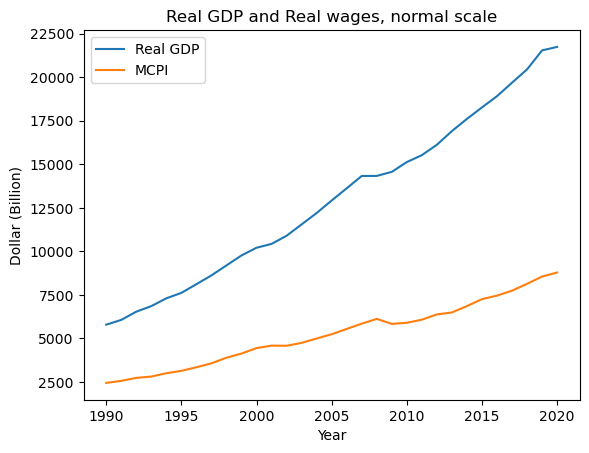

In [100]:
plt.plot(data["Date"], data["Real GDP"], label="Real GDP")
plt.plot(data["Date"], data["Real total wage 1"], label="MCPI")
plt.xlabel("Year")
plt.ylabel("Dollar (Billion)")
plt.title("Real GDP and Real wages, normal scale")
plt.legend()
plt.savefig('plot_21.png')
plt.show()

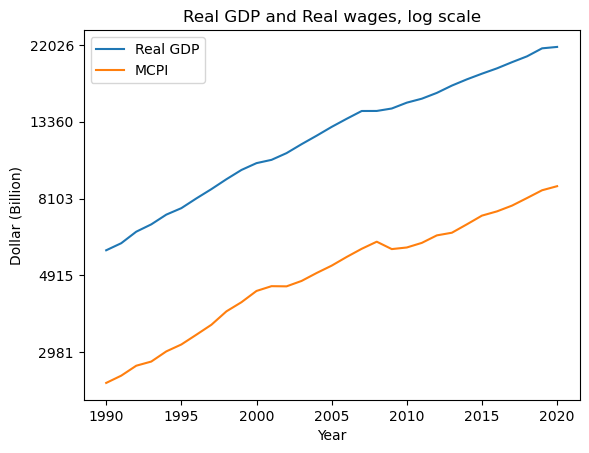

In [101]:
plt.plot(data["Date"], np.log(data["Real GDP"]), label="Real GDP")
plt.plot(data["Date"], np.log(data["Real total wage 1"]), label="MCPI")
plt.xlabel("Year")
plt.ylabel("Dollar (Billion)")
stick = [8.0, 8.5, 9.0, 9.5, 10.0]
plt.yticks(stick, [round(math.exp(i)) for i in stick])
plt.title("Real GDP and Real wages, log scale")
plt.legend()
plt.savefig('plot_22.png')
plt.show()

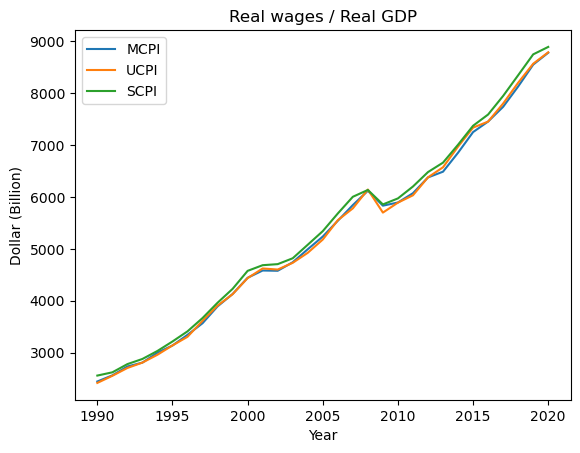

In [102]:
#plt.plot(data["Date"], data["Total wages and salaries"]/data["GDP"], label="Nominal")
plt.plot(data["Date"], data["Real total wage 1"], label="MCPI")
plt.plot(data["Date"], data["Real total wage 2"], label="UCPI")
plt.plot(data["Date"], data["Real total wage 3"], label="SCPI")

plt.xlabel("Year")
plt.ylabel("Dollar (Billion)")
plt.title("Real wages / Real GDP")
plt.legend()
plt.savefig('plot_23.png')
plt.show()

### 第二部份結論:
### 1. 在上述三項CPI指標中，大小為MCPI與UCPI相近、SCPI較小。其中SCPI與其他二者的差值可視為價格黏著性較低商品之消費者價格指數
### 2. 就MCPI與UCPI的關係而言，兩者隨時間交叉上升，可見"城市地區的消費者物價指數必高於中位數消費者物價指數"並非恆成立
### 3. 因以三項CPI平減之實質薪資相近，故以下合併討論
### 4. 正常尺度下，實質GDP與實質總薪資的差距逐年增加；對數尺度下，實質GDP與實質總薪資的差距逐年遞減
### 5. 自1990年至2020年，實質總薪資占實質GDP比重自25%升至42.5%
### 6. 正常尺度下，人均實質GDP與平均勞工實質薪資近乎以等距成長；對數尺度下，人均實質GDP與平均勞工實質薪資的差距逐年遞減
### 7. 自1990年至2020年，平均勞工實質薪資占人均實質GDP比重自40%升至75%
### 8. 就實質衡量而言，勞工的實質薪資逐年成長